# **Decision Tree Classifier**

## **Importing Required Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## **Setting Up the Current Working Directory**

In [2]:
# Checking the current working directory
print(os.getcwd())

D:\Coding\Git Repository\Data-Science-Bootcamp-with-Python\07_Decision_Tree


In [3]:
# Changing the location of the current working directory
file_path = "D:\Coding\Git Repository\Data-Science-Bootcamp-with-Python\Datasets"
os.chdir(file_path)

In [4]:
# Checking the working directory location
print(os.getcwd())

D:\Coding\Git Repository\Data-Science-Bootcamp-with-Python\Datasets


## **Reading the Dataset using Pandas**

In [5]:
# Reading the DailyDelhiClimateTest.csv data
dataset = "DailyDelhiClimateTest.csv"
data_path = file_path + "\\" + dataset
df = pd.read_csv(data_path)

In [6]:
# Checking the dataframe
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [7]:
# Checking the shape of the dataframe
df.shape

(114, 5)

In [8]:
# Printing the column names
df.columns

Index(['date', 'meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [9]:
# Checking the datatype of all the columns
df.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

## **Data Cleaning and Preprocessing**

In [10]:
# Checking the dataframe whether there is any null value or not
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [11]:
# Removing the data column from the dataset
df.drop(["date"], axis=1, inplace=True)

In [12]:
# Checking the shape of the data
df.shape

(114, 4)

In [13]:
# Creating a blank array
array = []

# Generating a for loop to categorize the humidity into 3 levels
for i in df["humidity"]:
    if i < 40:
        array.append(1)
    elif i >= 40 and i < 60:
        array.append(2)
    else:
        array.append(3)

In [14]:
# Converting the array into numpy array
array = np.array(array)
array

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1])

In [15]:
# Adding the humidity level data into the main dataframe
df["humidity_level"] = array

In [16]:
# Checking the dataframe after adding 'humidity_level' column
df.head()

,meantemp,humidity,wind_speed,meanpressure,humidity_level
0,15.913043,85.869565,2.743478,59.000000,3
1,18.500000,77.222222,2.894444,1018.277778,3
2,17.111111,81.888889,4.016667,1018.333333,3
3,18.700000,70.050000,4.545000,1015.700000,3
4,18.388889,74.944444,3.300000,1014.333333,3


## **Data Exploration and Visualization**

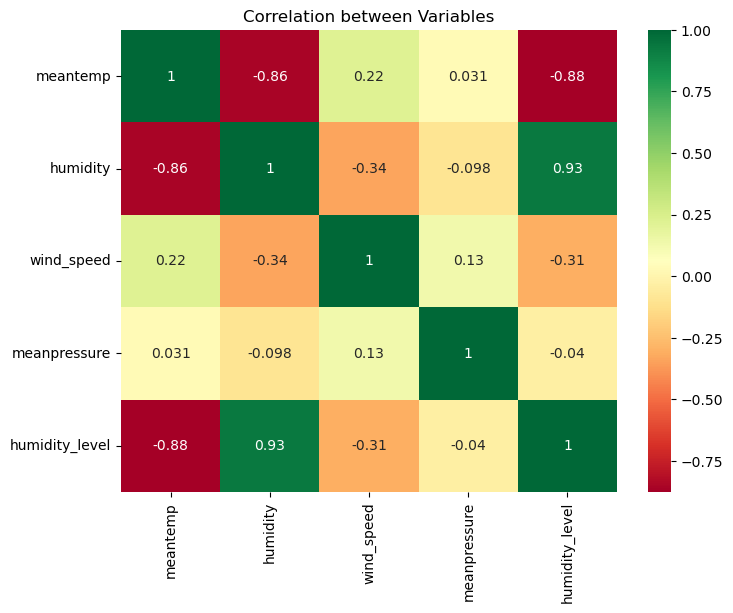

In [17]:
# Visualizing the correlations between variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.title("Correlation between Variables")
plt.show()

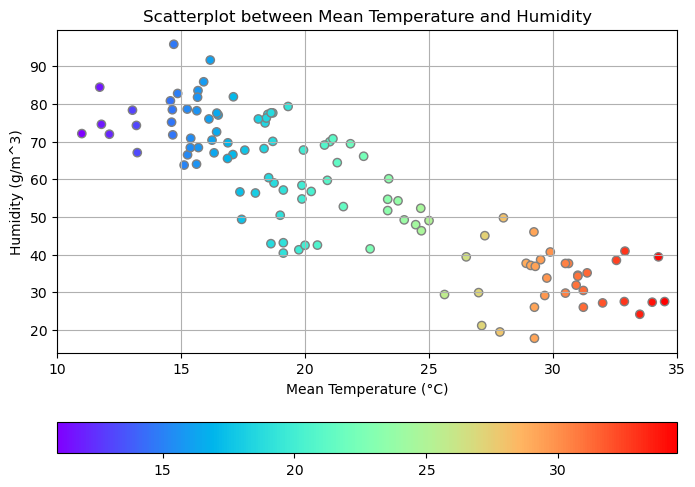

In [18]:
# Visualizing the Scatterplot between mean temperature and humidity
plt.figure(figsize=(8, 6))
plt.scatter(x=df["meantemp"], y=df["humidity"], cmap="rainbow", c=df["meantemp"], edgecolor="gray")
plt.grid()
plt.colorbar(orientation="horizontal")
plt.title("Scatterplot between Mean Temperature and Humidity")
plt.xlabel("Mean Temperature (°C)")
plt.xlim(10, 35)
plt.ylabel("Humidity (g/m^3)")
plt.show()

## **Preparing the Training and Testing Dataset**

In [19]:
# Selecting the independent and dependent variable
x = df[["meantemp", "wind_speed"]]
y = df[["humidity_level"]]

In [20]:
# Importing train_test_split from sklearn library
from sklearn.model_selection import train_test_split

In [21]:
# Preparing training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

## **Instantiating the Decision Tree Classifier Model**

In [22]:
# Importing the decision tree classifier model
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Instantiating the model
treeModel = DecisionTreeClassifier()
# Fitting the training data to the model
treeModel.fit(x_train, y_train)

DecisionTreeClassifier()

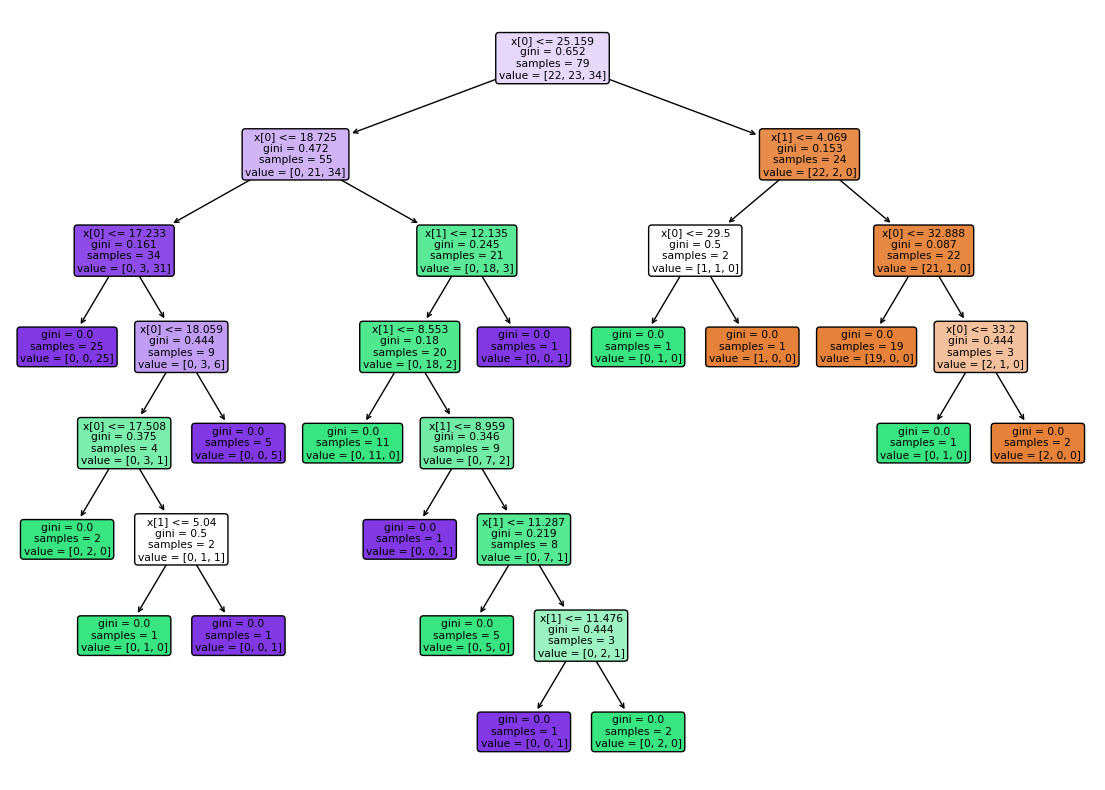

In [24]:
# Visualizing the tree split of the model
from sklearn import tree
plt.figure(figsize=(14, 10))
tree.plot_tree(treeModel, filled=True, rounded=True)
plt.show()

In [25]:
# Applying post prunning technique
treeModel2 = DecisionTreeClassifier(max_depth=2)
# Fitting the training data to the model
treeModel2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

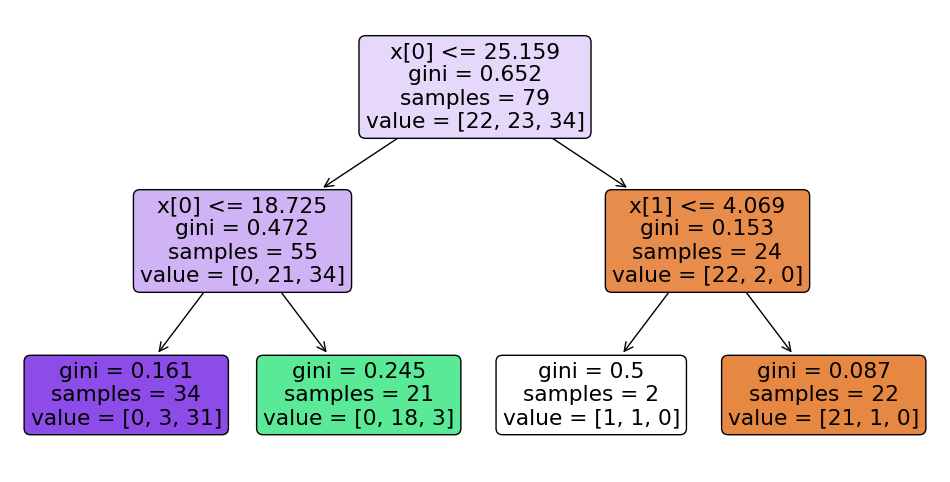

In [26]:
# Visualizing the tree split after post prunning
plt.figure(figsize=(12, 6))
tree.plot_tree(treeModel2, filled=True, rounded=True)
plt.show()

## **Validation of the Model**

In [27]:
# Predict the test data using the decision tree model
y_pred = treeModel2.predict(x_test)

In [28]:
# Import the model validation metrics from the sklearn library
from sklearn.metrics import accuracy_score, classification_report

In [29]:
score = accuracy_score(y_test, y_pred)
print("Model Score: ", score)

Model Score:  0.7142857142857143


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.70      1.00      0.82         7
           2       0.40      0.50      0.44         8
           3       0.93      0.70      0.80        20

    accuracy                           0.71        35
   macro avg       0.68      0.73      0.69        35
weighted avg       0.76      0.71      0.72        35

